### Introduction to Classification Problems 
We want to predict whether a person will default on his or her debt (i.e., is not able to pay his or her due), based on the annual income and the monthly credit card bill. The data set consists of the following variables:

- **default**: Binary response variable (**Yes** or **No**), whether or not the person defaults.
- **income**: (first numeric predictor) annual income of the person.
- **balance**: (second numeric predictor) monthly credit card balance.

The following **Python**-code chunk produces a scatter plot of **income** and **balance**.

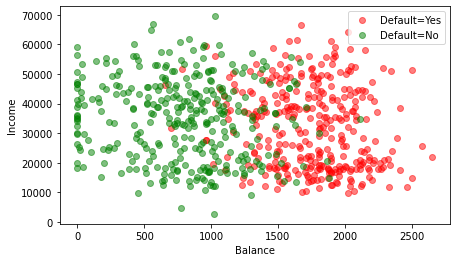

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./data/Default.csv', sep=';')

# Split the data based on default 
df_no = df.loc[df['default'] == 'No', :]
df_yes = df.loc[df['default'] == 'Yes', :]

# Random set of No:
i_no = np.random.choice(df_no.index, replace=False, size=333)

# Plot all Yes and a selection of No
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
plt.plot(df_yes['balance'], df_yes['income'], 
         'or', alpha=0.5, label='Default=Yes')
plt.plot(df_no['balance'][i_no], df_no['income'][i_no], 
         'og', alpha=0.5, label='Default=No')
ax.set_xlabel('Balance')
ax.set_ylabel('Income')
plt.legend()

plt.show()               

The resulting scatter plot of **income** versus **balance** is shown. The coloring of the vertices is according to the variable **default**,
i.e., red dots represent individuals who defaulted on their debts (**default=Yes**) and green dots represent the other ones (**default=No**). Note that there are actually far more observations with **default=No** (97% of 10000 in total). For the sake of lucidity, only a fraction of the class **default=No** is plotted. Visually, it seems obvious that people with a higher credit card balance tend to default on their debts more often than those who exhibit smaller balance. Moreover, the income does not seem to have a comparable high influence.

In addition, the next figure shows two pairs of box plots (computed from the complete data set) of the variable **balance** (left) and **income** (right). Again, the strong influence of **balance** becomes remarkably visible.


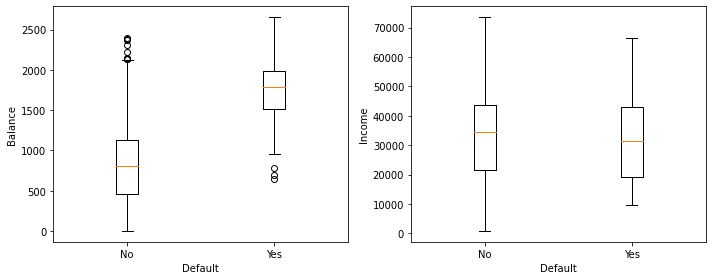

In [4]:
# Create Figure and subplots
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.boxplot([df_no['balance'], df_yes['balance']])
ax1.set_xlabel('Default')
ax1.set_ylabel('Balance')
ax1.set_xticklabels(['No','Yes'])

ax2 = fig.add_subplot(1, 2, 2)
ax2.boxplot([df_no['income'], df_yes['income']])
ax2.set_xlabel('Default')
ax2.set_ylabel('Income')
ax2.set_xticklabels(['No','Yes'])

plt.tight_layout()
plt.show()

In this example, the task of classification consists of building a model from the available data in order to achieve at least one of the following two tasks:
- *Infer* the way the variables **balance** ($ X_{1} $) and **income** ($ X_{2} $) affect the response variable  **Default** ($Y$).
- *Predict* the response variable  **Default** from given values for **balance**  and **income**.